In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cheapest-electric-cars/Cheapestelectriccars-EVDatabase.csv


In [2]:
df1= pd.read_csv("/kaggle/input/cheapest-electric-cars/Cheapestelectriccars-EVDatabase.csv")

In [3]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [4]:
print(df1.columns.tolist())

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK']


In [5]:
#filling empty data with 0

df1=df1.fillna('0')

In [6]:
df1['Manufacturer'] = df1.Name.str.split(' ', 1, expand=True)[0]

In [7]:
#cleaning the data

#removing currency sign

PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK

In [8]:
PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany

In [9]:
FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed

In [10]:
Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency

In [11]:
Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range

In [12]:
TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed

In [13]:
Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration

In [14]:
Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle

In [15]:
df1= df1.rename(columns = {'Subtitle':'KWH'})

In [16]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


In [18]:
df1.corr()

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


<AxesSubplot:>

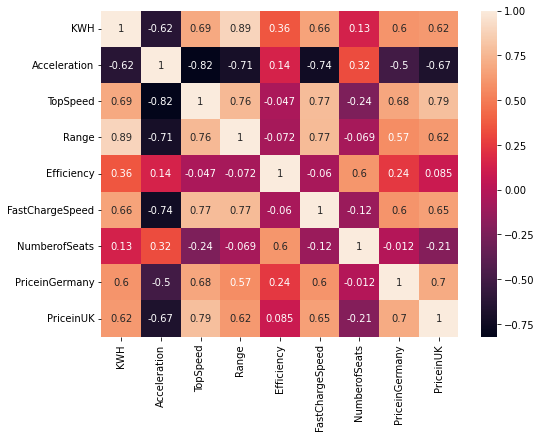

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

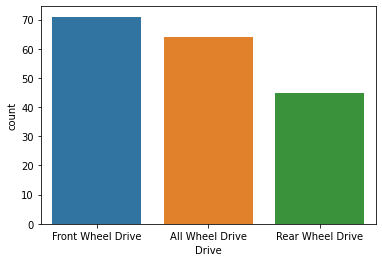

In [20]:
sns.countplot(x = 'Drive', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

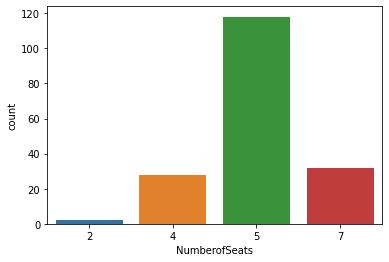

In [21]:
sns.countplot(x = 'NumberofSeats', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

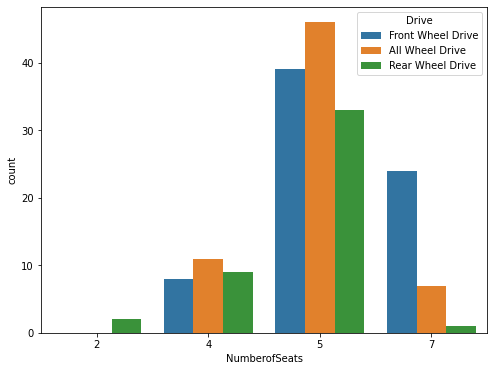

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

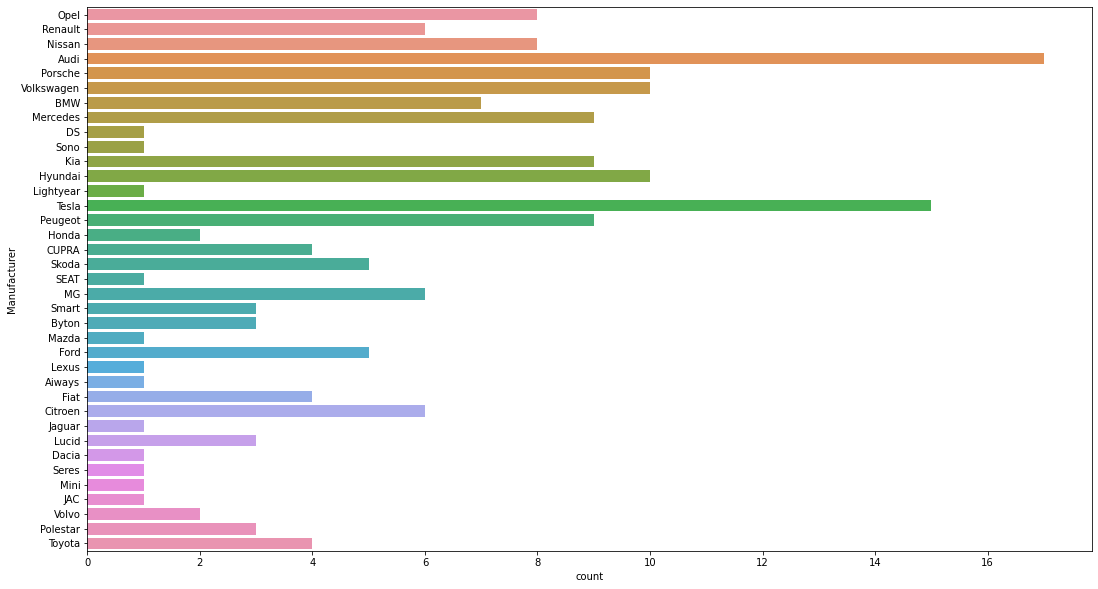

In [23]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df1)

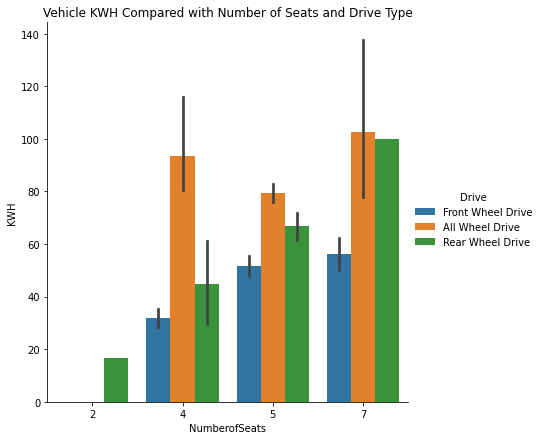

In [24]:
sns.catplot(data=df1, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

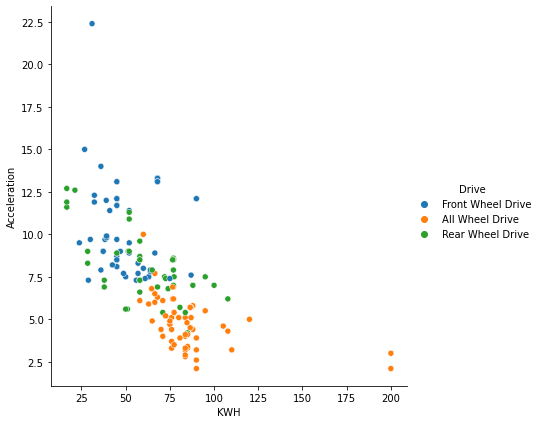

In [25]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df1)

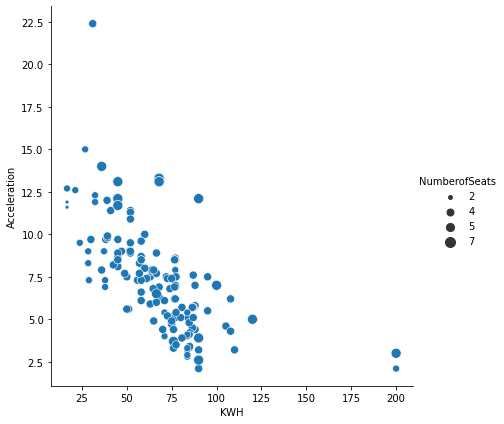

In [26]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df1)

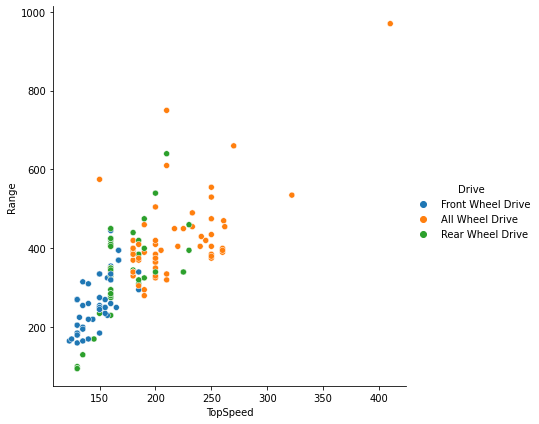

In [27]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df1)

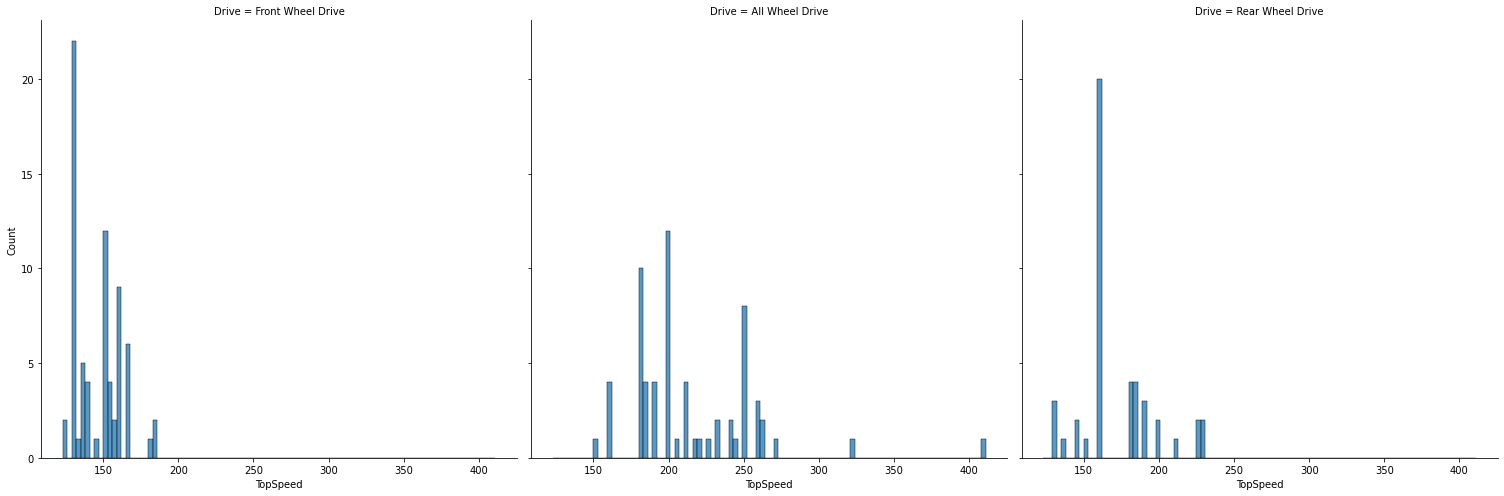

In [28]:
sns.displot(
    df1, x="TopSpeed", col="Drive", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

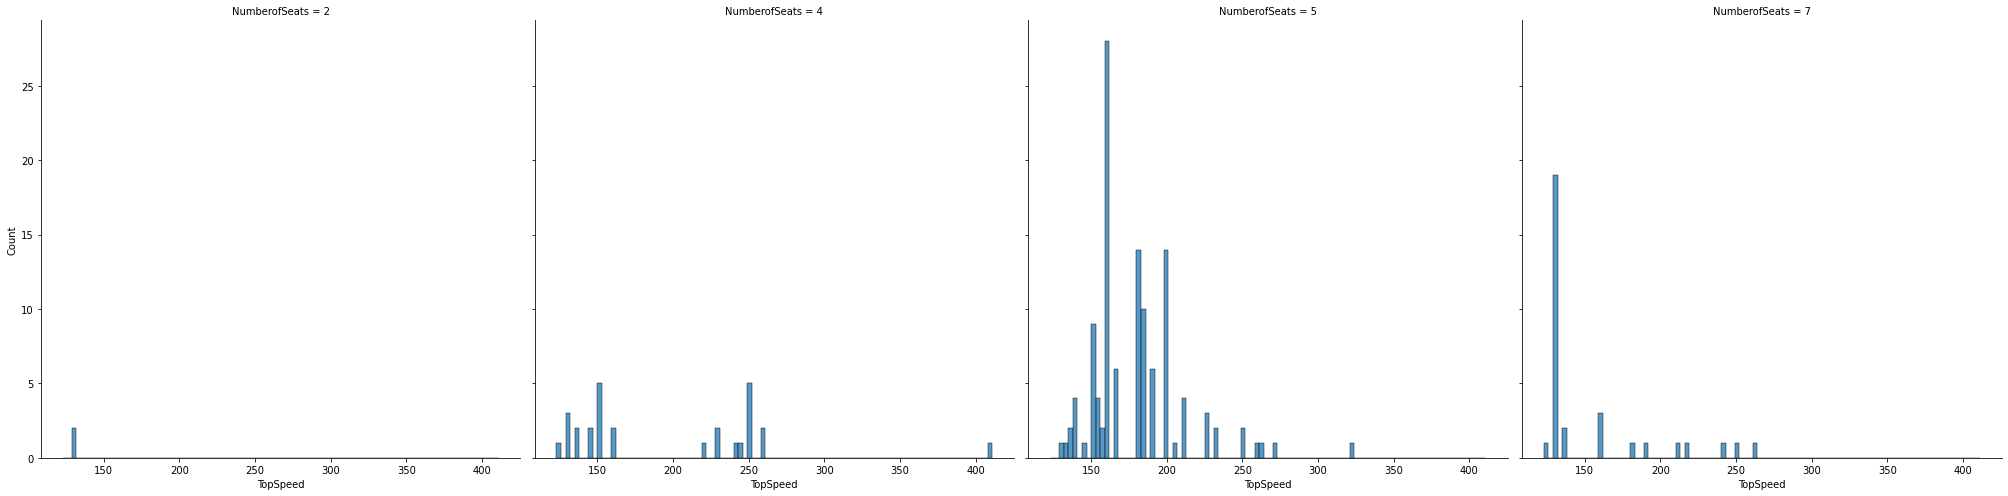

In [29]:
sns.displot(
    df1, x="TopSpeed", col="NumberofSeats", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

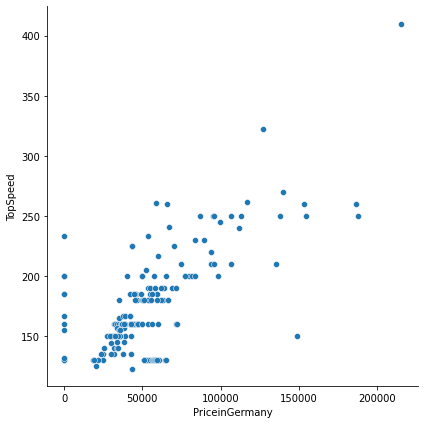

In [30]:
#relation between price and features

sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=df1)

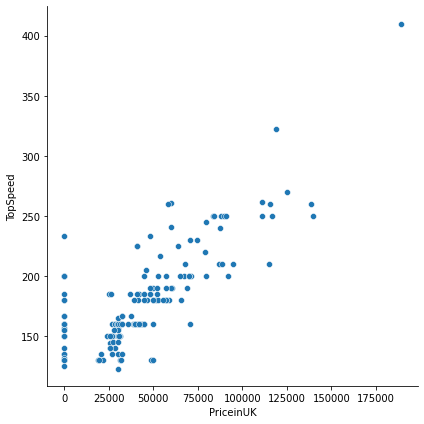

In [31]:
#relation between price and features

sns.relplot(x="PriceinUK", y="TopSpeed", height=6,data=df1)

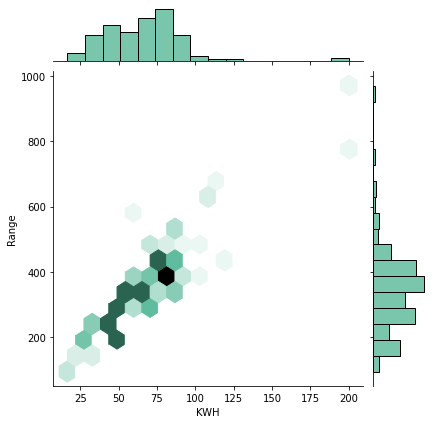

In [32]:
sns.jointplot(x=df1["KWH"], y=df1["Range"], kind="hex", color="#4CB391")

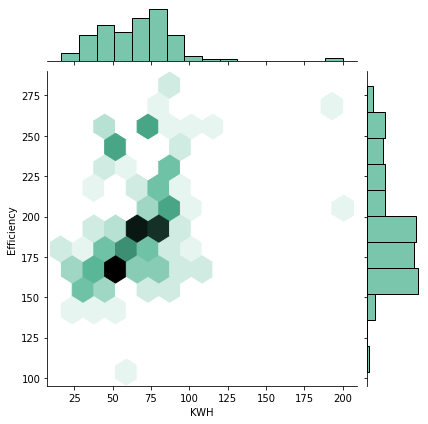

In [33]:
sns.jointplot(x=df1["KWH"], y=df1["Efficiency"], kind="hex", color="#4CB391")

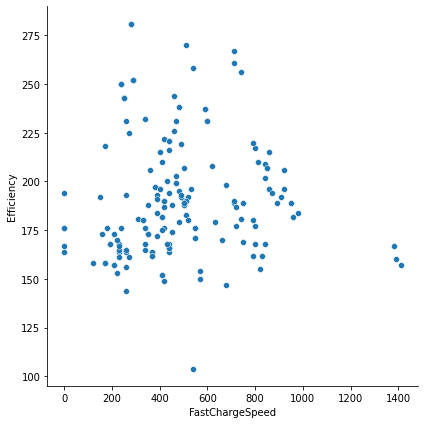

In [34]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df1)

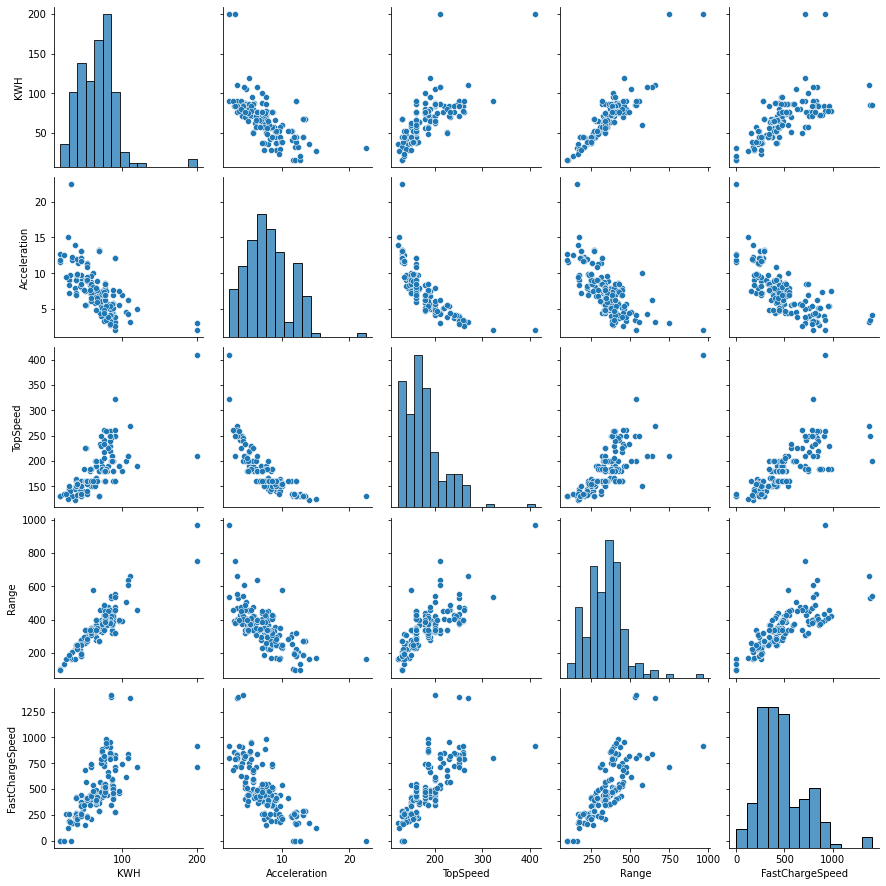

In [35]:
sns.pairplot(df1[["KWH","Acceleration","TopSpeed","Range","FastChargeSpeed"]])

In [36]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


# Machine Learning Model

We will predict the price of the vehicle based on all the parameters and data, one thing to be pointed is that many data points are missing. Let us take only the prices in UK Pound.

Considering 1 Euro = 0.85 Pound


In [37]:
c=0
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)        

Empty Values: 44


In [38]:
 pd.options.mode.chained_assignment = None

In [39]:
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinGermany"][i]*0.85
        df1["PriceinUK"][i]=val
        

In [40]:
df1.head()

,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [41]:
import category_encoders as ce

train_df=df1

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])


#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data
df_train.head()

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,1,5,42990,36541,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,1,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,1,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,3,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,3,4,186336,138830,Porsche


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int64  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(8), object(2)
memory usage: 17.0+ KB


In [43]:
X= df_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values

In [44]:
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

In [45]:
y=df_train['PriceinUK'].values

In [46]:
X.shape

(180, 8)

In [47]:
y.shape

(180,)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [49]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)

In [50]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [51]:
y_pred= regressor.predict(X_test)

In [52]:
y_test

array([ 69905,  30730,  42000,  38845, 110980,  32550,  43248,  28420,
        48000,  45145,  28500,  48824,  49750,      0,  57500,  51531,
        49465,  45507,  41330,  25491,  45000,  88700,  74739,  59990,
        21675,  55577,  29740,  43265,  32150,  87820,      0,  54000,
        30500,  90980,  20495,  32121,  54850,  42075,  31500,  63905,
        28730,  48490,  45900,  91905,  49495,  60600,      0,  30594,
        45000,  87000, 118980,  65720,  30255,  30550,  43900,  41570,
        48195,  70665,  29750,  83580])

In [53]:
y_pred

array([ 54441.6325    ,  31066.27555556,  41380.        ,  45479.69333333,
       114520.10011111,  35399.57666667,  40735.42897222,  32830.70111111,
        54001.08666667,  54295.79666667,  31681.26083333,  49643.10804365,
        40735.42897222,  35409.45458333,  64010.02277778,  49643.10804365,
        46875.94537302,  44265.14      ,  47877.97145238,  26695.64938889,
        53521.39666667,  71343.52896032,  74522.66555556,  86362.50333333,
        31944.27194444,  49637.88687698,  33099.70666667,  50518.21761905,
        36664.97611111,  84756.28011111,  26485.26066667,  55484.98333333,
        33099.70666667,  81142.91716667,  23535.63061111,  36504.92666667,
        49637.88687698,  41719.56333333,  31008.96444444,  71014.14102381,
        33094.92033333,  53272.6       ,  54491.59777778,  64035.14169048,
        49643.10804365,  58952.72694444,  23120.55166667,  37367.93833333,
        48409.47016667,  70814.42507143, 127800.99333333,  53660.58111111,
        32744.97711111,  

In [54]:
#Mean Absolute Error(MAE)

from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7155.050407804233


In [55]:
#Mean Squared Error(MSE)

from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  107902152.72013463


In [56]:
#Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  10387.596099200942


In [57]:
#R Squared (R2)

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  0.815987092758551
